In [7]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np 
from matplotlib import pyplot as plt
import os

In [3]:
mp_hands = mp.solutions.hands 
hands = mp_hands.Hands(static_image_mode=True,
                       min_detection_confidence=0.3,
                       max_num_hands=1)
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [34]:
IMG_DIR ='./Image/'
for dir_ in sorted(os.listdir(IMG_DIR),key=lambda x: int(x))[:5]:
    # print(dir_)
    for category in os.listdir(os.path.join(IMG_DIR,str(dir_)))[:5]:
        print(category)
        pass

0.jpg
1.jpg
10.jpg
100.jpg
1000.jpg
0.jpg
1.jpg
10.jpg
100.jpg
1000.jpg
0.jpg
1.jpg
10.jpg
100.jpg
1000.jpg
0.jpg
1.jpg
10.jpg
100.jpg
1000.jpg
0.jpg
1.jpg
10.jpg
100.jpg
1000.jpg


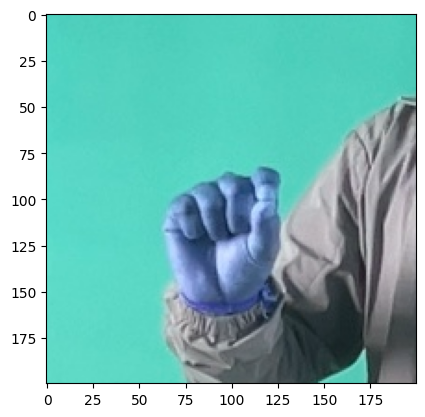

In [66]:

# frame =cv2.imread('1.jpg')
frame =cv2.imread('./Image/1/822.jpg')
H,W,_ = frame.shape 
image_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
results = hands.process(image_rgb)
SQUARE_SIZE=200
if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]
        
        x = hand_landmarks.landmark[9].x * frame.shape[1]
        y = hand_landmarks.landmark[9].y * frame.shape[0]
        
        w = hand_landmarks.landmark[12].x * frame.shape[1] - x 
        h = hand_landmarks.landmark[12].y * frame.shape[0] - y
    
        x_center = int(x )  
        y_center = int(y)
        
        x1 = int(x_center - SQUARE_SIZE/2)
        y1 = int(y_center - SQUARE_SIZE/2)
cropped_image1 = frame[y1:y1+SQUARE_SIZE, x1:x1+SQUARE_SIZE]

plt.figure()
plt.imshow(cropped_image1)


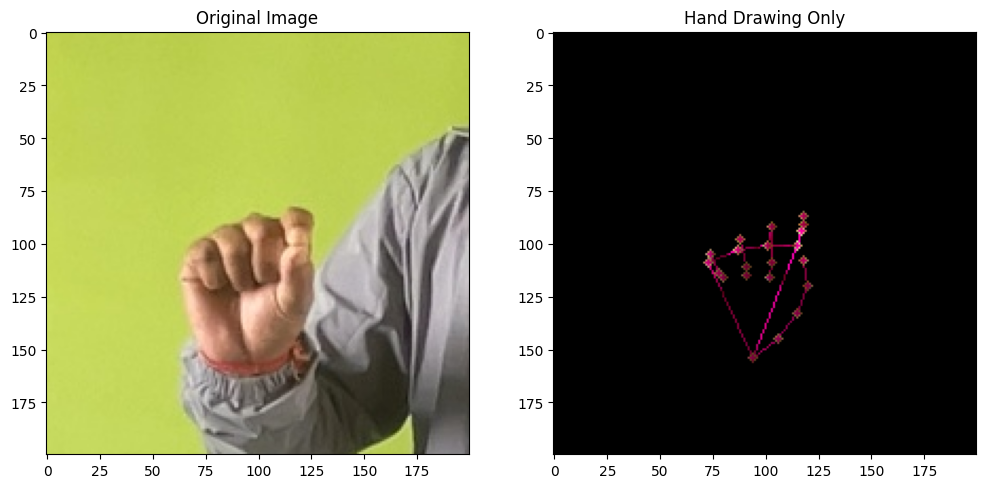

In [77]:

# Load the image
image_path = './Image/1/1.jpg'
# img1 = cv2.imread(image_path)
img1 = cropped_image1
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Initialize Mediapipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands()

# Process the image and get hand landmarks
results = hands.process(img1)

# Create a blank mask
mask = np.zeros_like(img1)

# Draw hand landmarks on the mask
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # mp_drawing.draw_landmarks(mask,
        #                            hand_landmarks,
        #                            mp_hands.HAND_CONNECTIONS,
        #                            mp_drawing_styles.get_default_hand_landmarks_style(),
        #                            mp_drawing_styles.get_default_hand_connections_style())
        mp_drawing.draw_landmarks(mask,
                                   hand_landmarks,
                                   mp_hands.HAND_CONNECTIONS,
                                #    mp_drawing_styles.DrawingSpec(color=(150,140,80),thickness=1,circle_radius=1),
                                #    mp_drawing_styles.DrawingSpec(color=(40,70,0),thickness=1,circle_radius=1))
                                   mp_drawing_styles.DrawingSpec(color=(255,0,255),thickness=1,circle_radius=1),
                                   mp_drawing_styles.DrawingSpec(color=(255,0,255),thickness=1,circle_radius=1))

# Apply the mask to the original image
result_img = cv2.bitwise_and(img1, mask)

# Display the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(result_img)
plt.title('Hand Drawing Only')

plt.show()


In [37]:
result_img.shape

(200, 200, 3)

In [78]:
IMG_DIR = './Image/'

for dir_ in sorted(os.listdir(IMG_DIR), key=lambda x: int(x))[1:2]:
    full_dir_path = os.path.join(IMG_DIR, str(dir_))
    for filename in sorted(os.listdir(full_dir_path), key=lambda x: int(os.path.splitext(x)[0]))[820:830]:
        path= os.path.join(IMG_DIR,str(dir_),str(filename))
        frame =cv2.imread(path)
        H,W,_ = frame.shape 
        image_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        results = hands.process(image_rgb)
        SQUARE_SIZE=200
        try:
                if results.multi_hand_landmarks:
                    hand_landmarks = results.multi_hand_landmarks[0]
                    
                    x = hand_landmarks.landmark[9].x * frame.shape[1]
                    y = hand_landmarks.landmark[9].y * frame.shape[0]
                    
                    w = hand_landmarks.landmark[12].x * frame.shape[1] - x 
                    h = hand_landmarks.landmark[12].y * frame.shape[0] - y
                
                    x_center = int(x )  
                    y_center = int(y)
                    
                    x1 = int(x_center - SQUARE_SIZE/2)
                    y1 = int(y_center - SQUARE_SIZE/2)
                cropped_image1 = frame[y1:y1+SQUARE_SIZE, x1:x1+SQUARE_SIZE]

                cv2.imwrite(filename,cropped_image1)
        except Exception as e: 
            print(path)

        


./Image/1\820.jpg
./Image/1\821.jpg
